In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl

In [ ]:
df = pd.read_csv('Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


**Data Cleaning**

In [ ]:
# Remove 'RowNumber' column and set 'CustomerId' as an index

def set_column(df):
  df = df.drop('RowNumber', axis=1)
  df.set_index('CustomerId', inplace=True)
  return df

df = set_column(df)
df.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,,,,,,,,,,,,
15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**Exploratory Data Analysis**

In [ ]:
pip install ydata_profiling

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.4/400.4 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 56.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.3 MB/s eta 0:00:00


In [ ]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Churn Profiling Report")
profile.to_file("report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 12/12 [00:00<00:00, 28.94it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
profile

In [ ]:
# checking dupclicate, null, unique value
print('duplicate value:', df.duplicated().sum())
print()
print('null value:')
print(df.isnull().sum())
print()
print('unique value:')
print(df.nunique())

duplicate value: 0

null value:
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

unique value:
Surname            2932
CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64


In [ ]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


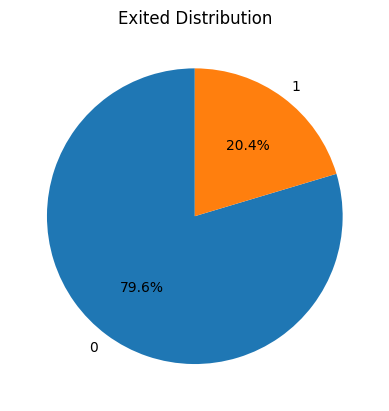

In [ ]:
# Target label (Exited) Distribution
count = df['Exited'].value_counts()
labels = [0, 1]

plt.pie(count, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Exited Distribution')
plt.show()

In [ ]:
# Detecting outlier with IQR
Q1 = df['Balance'].quantile(0.25)
Q3 = df['Balance'].quantile(0.75)
IQR = Q3 - Q1

OutlierQ1 = Q1 - 1.5 * IQR
OutlierQ3 = Q3 + 1.5 * IQR

print('Q1:', Q1)
print('Q3:', Q3)
print('IQR:', IQR)
print('OutlierQ1:', OutlierQ1)
print('OutlierQ3:', OutlierQ3)

Q1: 0.0
Q3: 127644.24
IQR: 127644.24
OutlierQ1: -191466.36000000002
OutlierQ3: 319110.60000000003


<Axes: ylabel='Balance'>

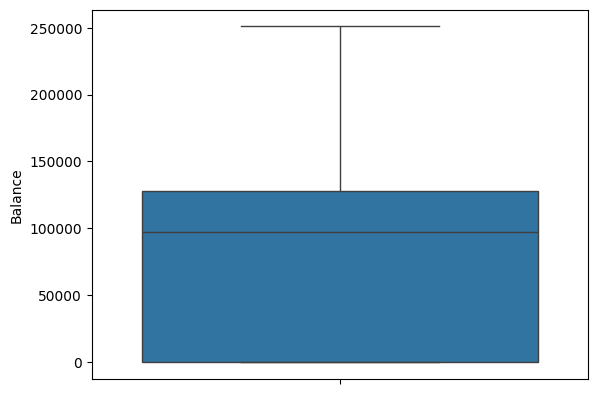

In [ ]:
sns.boxplot(df['Balance'])

<Axes: xlabel='CreditScore', ylabel='Count'>

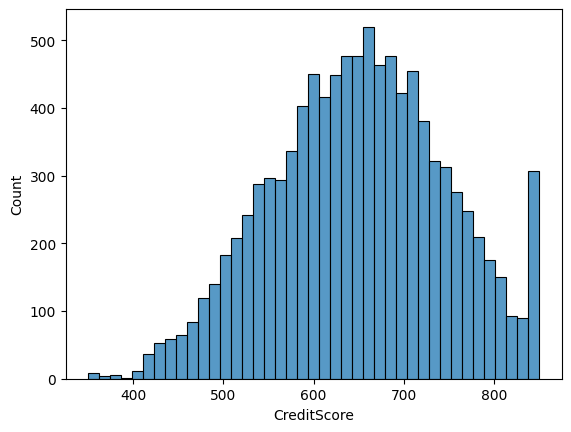

In [ ]:
sns.histplot(df['CreditScore'], kde=False)

<Axes: xlabel='Age', ylabel='Count'>

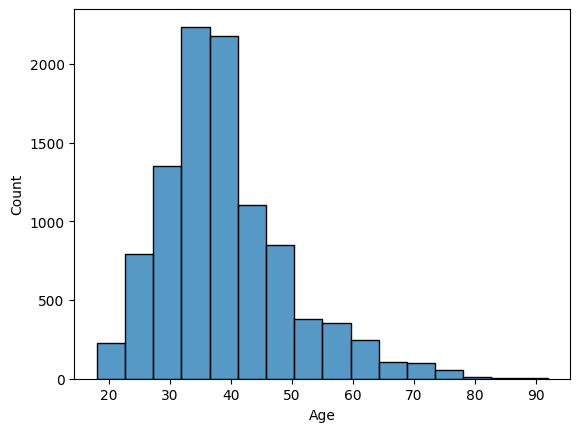

In [ ]:
sns.histplot(df['Age'], kde=False, bins=16)

array([[<Axes: xlabel='CreditScore', ylabel='CreditScore'>,
        <Axes: xlabel='Age', ylabel='CreditScore'>,
        <Axes: xlabel='Tenure', ylabel='CreditScore'>,
        <Axes: xlabel='Balance', ylabel='CreditScore'>,
        <Axes: xlabel='EstimatedSalary', ylabel='CreditScore'>],
       [<Axes: xlabel='CreditScore', ylabel='Age'>,
        <Axes: xlabel='Age', ylabel='Age'>,
        <Axes: xlabel='Tenure', ylabel='Age'>,
        <Axes: xlabel='Balance', ylabel='Age'>,
        <Axes: xlabel='EstimatedSalary', ylabel='Age'>],
       [<Axes: xlabel='CreditScore', ylabel='Tenure'>,
        <Axes: xlabel='Age', ylabel='Tenure'>,
        <Axes: xlabel='Tenure', ylabel='Tenure'>,
        <Axes: xlabel='Balance', ylabel='Tenure'>,
        <Axes: xlabel='EstimatedSalary', ylabel='Tenure'>],
       [<Axes: xlabel='CreditScore', ylabel='Balance'>,
        <Axes: xlabel='Age', ylabel='Balance'>,
        <Axes: xlabel='Tenure', ylabel='Balance'>,
        <Axes: xlabel='Balance', ylabel='Balan

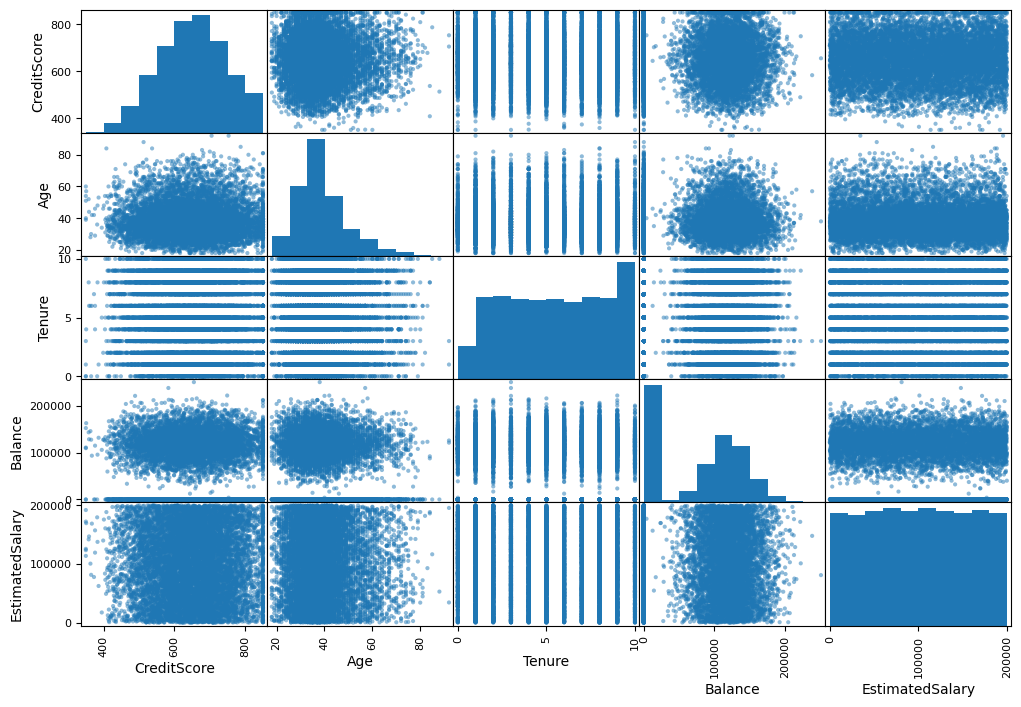

In [ ]:
from pandas.plotting import scatter_matrix
attributes = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
scatter_matrix(df[attributes], figsize=(12, 8))

In [ ]:
corr_matrix = df[attributes].corr()
corr_matrix['Balance'].sort_values(ascending=False)

,Balance
Balance,1.000000
Age,0.028308
EstimatedSalary,0.012797
CreditScore,0.006268
Tenure,-0.012254


**Data Preprocessing**

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

# Define the numerical and categorical columns that should be processed as features
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
categorical_features = ['Geography', 'Gender']

preprocessor = ColumnTransformer(
    transformers=[
        ('num_scaler', MinMaxScaler(), numerical_features),
        ('cat_encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ],
    remainder='drop'
)

df_prepared = preprocessor.fit_transform(df)

**Splitting Data into Data Train and Data Test**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

x = df_prepared
y = df['Exited']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

**Logistic Regression**

In [ ]:
log_reg = LogisticRegression()

In [ ]:
log_reg.fit(x_train, y_train)

LogisticRegression()

**Model Evaluation**

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

print("Model Evaluation on Original Test Set:")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test,y_pred))

Model Evaluation on Original Test Set:

Confusion Matrix:
[[2328   88]
 [ 472  112]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      2416
           1       0.56      0.19      0.29       584

    accuracy                           0.81      3000
   macro avg       0.70      0.58      0.59      3000
weighted avg       0.78      0.81      0.77      3000


Accuracy Score:
0.8133333333333334


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

y_pred = log_reg.predict(x_test)
roc_auc_score(y, log_reg.predict_proba(x)[:, 1])

np.float64(0.7667848433269951)

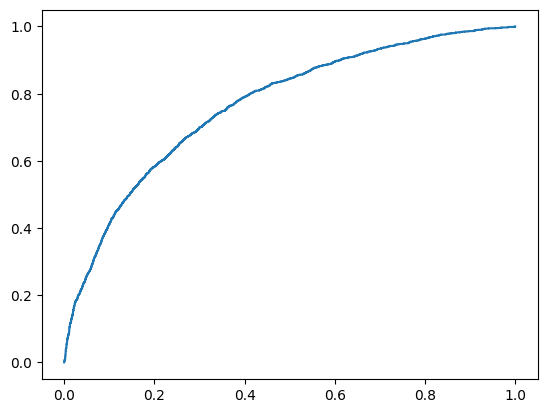

In [ ]:
# display the roc
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y, log_reg.predict_proba(x)[:, 1])
plt.plot(fpr, tpr)

**Cross Validation**

In [ ]:
from sklearn.model_selection import cross_validate

scores = cross_validate(log_reg, x_train, y_train,
                         scoring=['accuracy', 'precision', 'recall', 'f1'],
                         cv=10,
                         return_train_score=False)

In [ ]:
def print_scores(cv_scores_dict):
    print("Accuracy Mean:", cv_scores_dict['test_accuracy'].mean())
    print("Precision Mean:", cv_scores_dict['test_precision'].mean())
    print("Recall Mean:", cv_scores_dict['test_recall'].mean())
    print("F1 Mean:", cv_scores_dict['test_f1'].mean())
print_scores(scores)

Accuracy Mean: 0.8098571428571428
Precision Mean: 0.6228319470025628
Recall Mean: 0.20790741615493621
F1 Mean: 0.31022922894681815


**Resampling Data**

SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

print("SMOTE resampling completed successfully.")
print("Shape of original training data (X_train):", x_train.shape)
print("Shape of resampled training data (X_train_resampled):", x_train_resampled.shape)
print("Class distribution before SMOTE (y_train):\n", y_train.value_counts())
print("Class distribution after SMOTE (y_train_resampled):\n", y_train_resampled.value_counts())

SMOTE resampling completed successfully.
Shape of original training data (X_train): (7000, 13)
Shape of resampled training data (X_train_resampled): (11094, 13)
Class distribution before SMOTE (y_train):
 Exited
0    5547
1    1453
Name: count, dtype: int64
Class distribution after SMOTE (y_train_resampled):
 Exited
1    5547
0    5547
Name: count, dtype: int64


In [ ]:
log_reg_resampled = LogisticRegression()
log_reg_resampled.fit(x_train_resampled, y_train_resampled)

LogisticRegression()

In [ ]:
# model evaluation with resampled data
y_pred = log_reg_resampled.predict(x_test)

In [ ]:
print("Model Evaluation on Original Test Set:")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test,y_pred))

Model Evaluation on Original Test Set:

Confusion Matrix:
[[1733  683]
 [ 176  408]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.72      0.80      2416
           1       0.37      0.70      0.49       584

    accuracy                           0.71      3000
   macro avg       0.64      0.71      0.64      3000
weighted avg       0.80      0.71      0.74      3000


Accuracy Score:
0.7136666666666667


Undersampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
x_tr_undersampled, y_tr_undersampled = RandomUnderSampler(random_state=42).fit_resample(x_train, y_train)

print("Undersampling completed successfully.")
print("Shape of original training data (X_train):", x_train.shape)
print("Shape of resampled training data (X_train_resampled):", x_tr_undersampled.shape)
print("Class distribution before undersampling (y_train):\n", y_train.value_counts())
print("Class distribution after undersampling (y_train_resampled):\n", y_tr_undersampled.value_counts())

Undersampling completed successfully.
Shape of original training data (X_train): (7000, 13)
Shape of resampled training data (X_train_resampled): (2906, 13)
Class distribution before SMOTE (y_train):
 Exited
0    5547
1    1453
Name: count, dtype: int64
Class distribution after SMOTE (y_train_resampled):
 Exited
0    1453
1    1453
Name: count, dtype: int64


In [ ]:
log_reg_undersampled = LogisticRegression()
log_reg_undersampled.fit(x_tr_undersampled, y_tr_undersampled)

LogisticRegression()

In [ ]:
# model evaluation with resampled data
y_pred = log_reg_undersampled.predict(x_test)

In [ ]:
print("Model Evaluation on Original Test Set:")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test,y_pred))

Model Evaluation on Original Test Set:

Confusion Matrix:
[[1692  724]
 [ 174  410]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.70      0.79      2416
           1       0.36      0.70      0.48       584

    accuracy                           0.70      3000
   macro avg       0.63      0.70      0.63      3000
weighted avg       0.80      0.70      0.73      3000


Accuracy Score:
0.7006666666666667


**Hyperparameter Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Define compatible parameter grids for LogisticRegression
param_grid = [
    {'penalty': ['l2', None], 'solver': ['lbfgs', 'newton-cg', 'newton-cholesky', 'sag']},
    {'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
    {'penalty': ['l1', 'l2', 'elasticnet', None], 'solver': ['saga']}
]

tuning_logreg = LogisticRegression(max_iter=1000)

grid_search = GridSearchCV(tuning_logreg, param_grid, cv=5,
                           scoring=['accuracy', 'precision', 'recall', 'f1'],
                           return_train_score=True,
                           refit='accuracy')

grid_search.fit(x_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_glm/_newton_solver.py:576: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration 2. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=2.23282e-18): result may not be accurate.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_glm/_newton_solver.py:576: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration 2. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing th

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid=[{'penalty': ['l2', None],
                          'solver': ['lbfgs', 'newton-cg', 'newton-cholesky',
                                     'sag']},
                         {'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
                         {'penalty': ['l1', 'l2', 'elasticnet', None],
                          'solver': ['saga']}],
             refit='accuracy', return_train_score=True,
             scoring=['accuracy', 'precision', 'recall', 'f1'])

In [ ]:
print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'penalty': 'l2', 'solver': 'liblinear'}


In [ ]:
print("Best score found: ", grid_search.best_score_)

Best score found:  0.8104285714285714


In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Get the best estimator from GridSearchCV
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred_best = best_model.predict(x_test)

print("Model Evaluation on Test Set (Best GridSearch Model):")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred_best))

Model Evaluation on Test Set (Best GridSearch Model):

Confusion Matrix:
[[2328   88]
 [ 472  112]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      2416
           1       0.56      0.19      0.29       584

    accuracy                           0.81      3000
   macro avg       0.70      0.58      0.59      3000
weighted avg       0.78      0.81      0.77      3000


Accuracy Score:
0.8133333333333334


In [ ]:
import pandas as pd

results_all_metrics = pd.DataFrame(grid_search.cv_results_)
results_all_metrics = results_all_metrics[['param_penalty', 'param_solver', 'mean_test_accuracy', 'mean_test_precision', 'mean_test_recall', 'mean_test_f1', 'rank_test_accuracy']]
results_all_metrics = results_all_metrics.sort_values(by='rank_test_accuracy')
print("All evaluation metrics for all parameter combinations:")
display(results_all_metrics)

All evaluation metrics for all parameter combinations:


,param_penalty,param_solver,mean_test_accuracy,mean_test_precision,mean_test_recall,mean_test_f1,rank_test_accuracy
9,l2,liblinear,0.810429,0.631507,0.209949,0.313918,1
0,l2,lbfgs,0.810286,0.630434,0.209949,0.313762,2
3,l2,sag,0.810143,0.629097,0.209262,0.312917,3
2,l2,newton-cholesky,0.810143,0.629097,0.209262,0.312917,3
11,l2,saga,0.810143,0.629097,0.209262,0.312917,3
1,l2,newton-cg,0.810000,0.628029,0.209262,0.312737,6
4,None,lbfgs,0.809000,0.611611,0.218898,0.321094,7
5,None,newton-cg,0.808857,0.612087,0.216831,0.318917,8
7,None,sag,0.808857,0.611255,0.217521,0.319610,8
6,None,newton-cholesky,0.808857,0.611092,0.218206,0.320309,8


In [ ]:
import pandas as pd

results = pd.DataFrame(grid_search.cv_results_)
results = results[['param_penalty', 'param_solver', 'mean_test_accuracy', 'rank_test_accuracy']]
results = results.sort_values(by='rank_test_accuracy')
print("Accuracy scores for all parameter combinations:")
display(results)

Accuracy scores for all parameter combinations:


,param_penalty,param_solver,mean_test_accuracy,rank_test_accuracy
9,l2,liblinear,0.810429,1
0,l2,lbfgs,0.810286,2
3,l2,sag,0.810143,3
2,l2,newton-cholesky,0.810143,3
11,l2,saga,0.810143,3
1,l2,newton-cg,0.810000,6
4,None,lbfgs,0.809000,7
5,None,newton-cg,0.808857,8
7,None,sag,0.808857,8
6,None,newton-cholesky,0.808857,8
